# Análisis Cuantitativo de Datos Históricos de Cacao

En este notebook analizaremos datos diarios del cacao para:
- Cargar y explorar la estructura de datos.
- Calcular el precio ajustado (en caso de que `close` sea un delta respecto a `open`).
- Calcular rendimientos (returns) diarios.
- Visualizar la serie de precios y sus rendimientos.
- Estimar y graficar la volatilidad con una ventana móvil de 30 días.
- Discutir interpretaciones y próximos pasos en el análisis.


In [13]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración para visualizar gráficos embebidos
%matplotlib inline

## Carga y Exploración de Datos

En esta sección cargamos el archivo Excel que contiene los datos históricos del cacao y revisamos sus primeras filas y la estructura general. Ajusta la ruta a tu archivo según corresponda.

In [14]:
# Ruta al archivo (ajusta según tu sistema)
file_path = '/Users/charly_1/Documents/GitHub/crop_analysis/data_inputs/historical_data.xlsx'

# Cargamos el archivo Excel
data = pd.read_excel(file_path)

# Visualizamos las primeras filas para entender la estructura de los datos
data.head()

,ctm,ctmString,open,close,high,low,vol
0,1577919600000,"Jan 2, 2020, 12:00:00 AM",2517,-1,41,-17,64054
1,1578006000000,"Jan 3, 2020, 12:00:00 AM",2521,-5,48,-11,72743
2,1578265200000,"Jan 6, 2020, 12:00:00 AM",2510,-27,10,-50,47724
3,1578351600000,"Jan 7, 2020, 12:00:00 AM",2483,47,59,-13,49760
4,1578438000000,"Jan 8, 2020, 12:00:00 AM",2523,-25,5,-32,44211


In [15]:
# Revisamos la información general del DataFrame para identificar tipos de datos y columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ctm        1306 non-null   int64 
 1   ctmString  1306 non-null   object
 2   open       1306 non-null   int64 
 3   close      1306 non-null   int64 
 4   high       1306 non-null   int64 
 5   low        1306 non-null   int64 
 6   vol        1306 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 71.6+ KB


## Cálculo del Precio Ajustado y Rendimientos Diarios

En el dataset, se observa que la columna `close` podría ser un valor de **delta** (cambio) respecto a la columna `open`. Por tanto, para obtener el **precio real**, definiremos una nueva columna `Adj_Close`:

```
Adj_Close = open + close
```

Después calcularemos los rendimientos logarítmicos diarios usando:

```
Return = ln(Adj_Close_t / Adj_Close_(t-1))
```

Esto nos permitirá medir la variación porcentual del precio.

In [16]:
# Convertimos la columna de fecha a formato datetime usando 'ctmString'
data['Date'] = pd.to_datetime(data['ctmString'], format='%b %d, %Y, %I:%M:%S %p')

# Ordenamos el DataFrame por fecha
data.sort_values('Date', inplace=True)

# Calculamos el precio ajustado (precio real) como la suma de 'open' y 'close'
data['Adj_Close'] = data['open'] + data['close']

# Calculamos el rendimiento logarítmico diario usando el precio ajustado
data['Return'] = np.log(data['Adj_Close'] / data['Adj_Close'].shift(1))

# Visualizamos las primeras filas para confirmar el cálculo
data.head()

,ctm,ctmString,open,close,high,low,vol,Date,Adj_Close,Return
0,1577919600000,"Jan 2, 2020, 12:00:00 AM",2517,-1,41,-17,64054,2020-01-02,2516,NaN
1,1578006000000,"Jan 3, 2020, 12:00:00 AM",2521,-5,48,-11,72743,2020-01-03,2516,0.000000
2,1578265200000,"Jan 6, 2020, 12:00:00 AM",2510,-27,10,-50,47724,2020-01-06,2483,-0.013203
3,1578351600000,"Jan 7, 2020, 12:00:00 AM",2483,47,59,-13,49760,2020-01-07,2530,0.018752
4,1578438000000,"Jan 8, 2020, 12:00:00 AM",2523,-25,5,-32,44211,2020-01-08,2498,-0.012729


## Visualización de la Serie de Precios y Rendimientos

Graficamos la serie de precios ajustados (tomando `Adj_Close`) y los rendimientos diarios para identificar visualmente tendencias y la volatilidad a lo largo del tiempo.

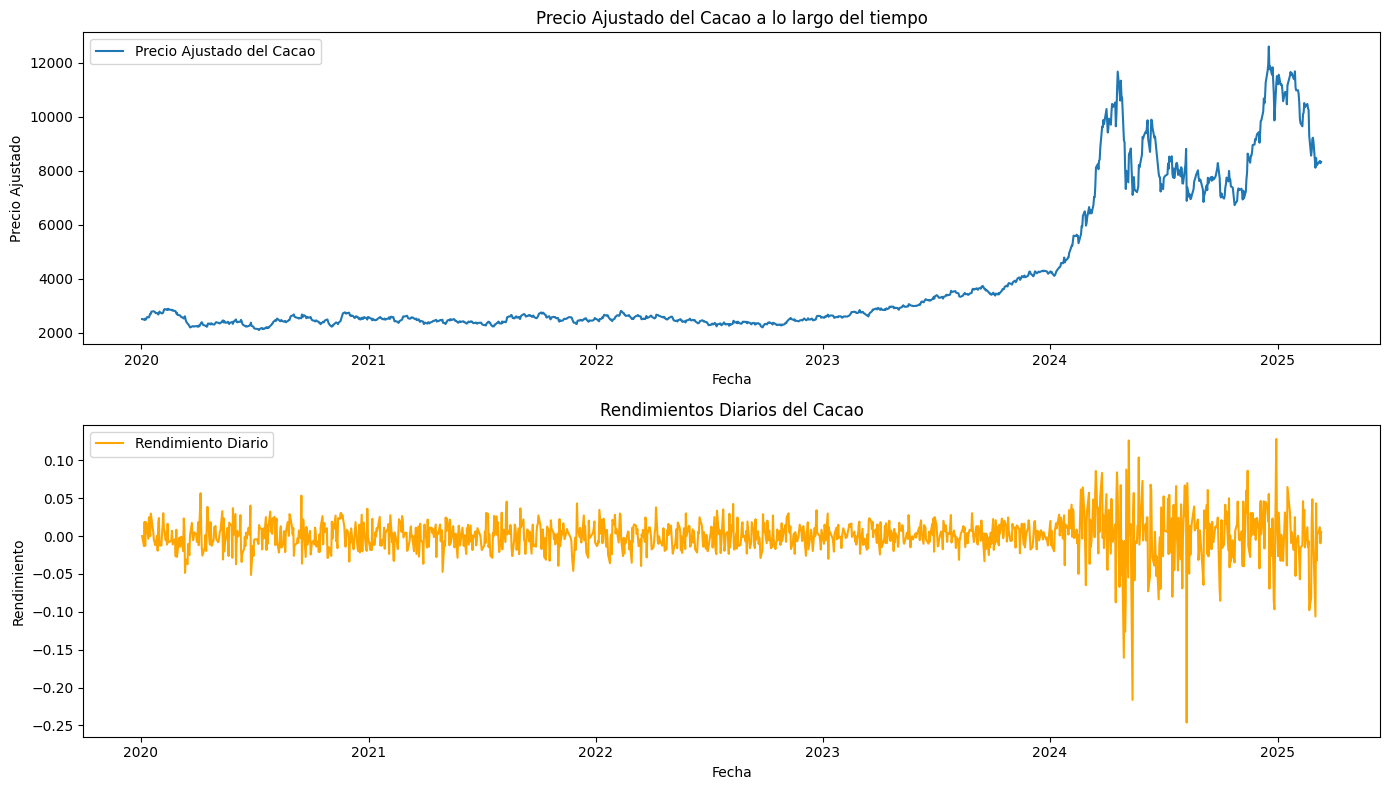

In [17]:
plt.figure(figsize=(14, 8))

# Gráfico del precio ajustado del cacao
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Adj_Close'], label='Precio Ajustado del Cacao')
plt.title('Precio Ajustado del Cacao a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()

# Gráfico de los rendimientos diarios
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Return'], label='Rendimiento Diario', color='orange')
plt.title('Rendimientos Diarios del Cacao')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.legend()

plt.tight_layout()
plt.show()

## Cálculo y Visualización de la Volatilidad

Utilizaremos una ventana móvil de 30 días para estimar la volatilidad, definida como la desviación estándar de los rendimientos diarios. Esta medida nos ayuda a entender la variabilidad de los precios a lo largo del tiempo.

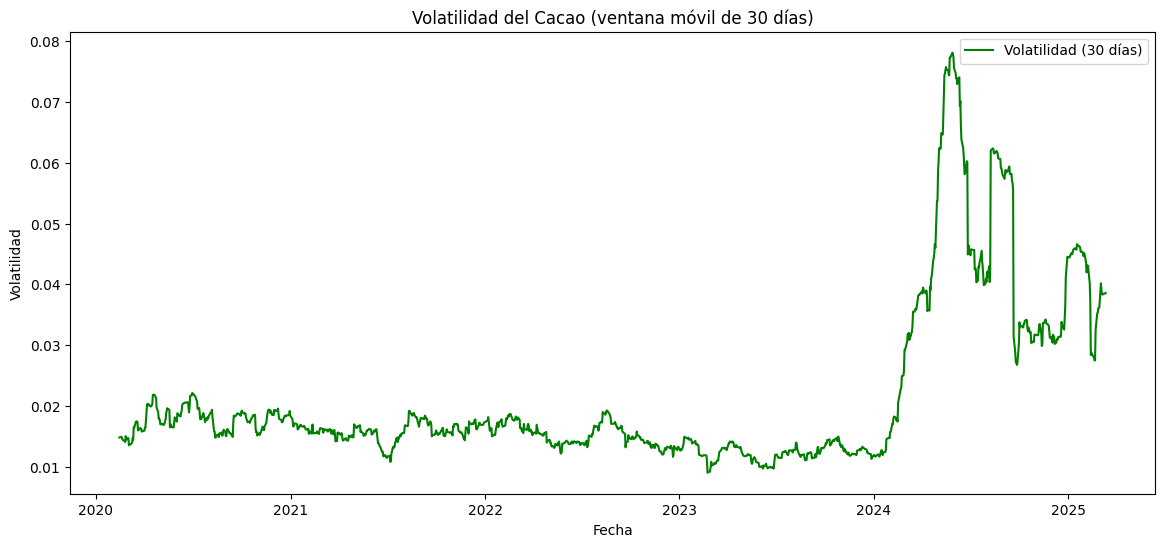

In [18]:
# Calculamos la volatilidad usando una ventana móvil de 30 días
data['Volatilidad_30'] = data['Return'].rolling(window=30).std()

# Graficamos la volatilidad
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Volatilidad_30'], label='Volatilidad (30 días)', color='green')
plt.title('Volatilidad del Cacao (ventana móvil de 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.show()

## ¿Qué Implica la Volatilidad?

La **volatilidad** refleja cuánta variación o fluctuación presentan los rendimientos del precio del cacao en un periodo determinado. 

- **Valores altos de volatilidad**: Indican cambios más bruscos en el precio, lo cual implica un mayor riesgo y potenciales movimientos extremos (tanto al alza como a la baja).
- **Valores bajos de volatilidad**: Señalan estabilidad en los precios, con menos fluctuaciones diarias.

Al observar picos de volatilidad, conviene investigar los factores que pudieron causarlos (eventos climáticos, noticias, cambios en políticas, etc.). Entender la volatilidad ayuda en la toma de decisiones de trading y gestión de riesgo.

## 1. Análisis de Estacionalidad y Tendencias

En esta sección utilizaremos la función `seasonal_decompose` de `statsmodels` para descomponer la serie temporal del precio ajustado (`Adj_Close`). Esto nos ayudará a identificar la tendencia general, la estacionalidad y los componentes de ruido.


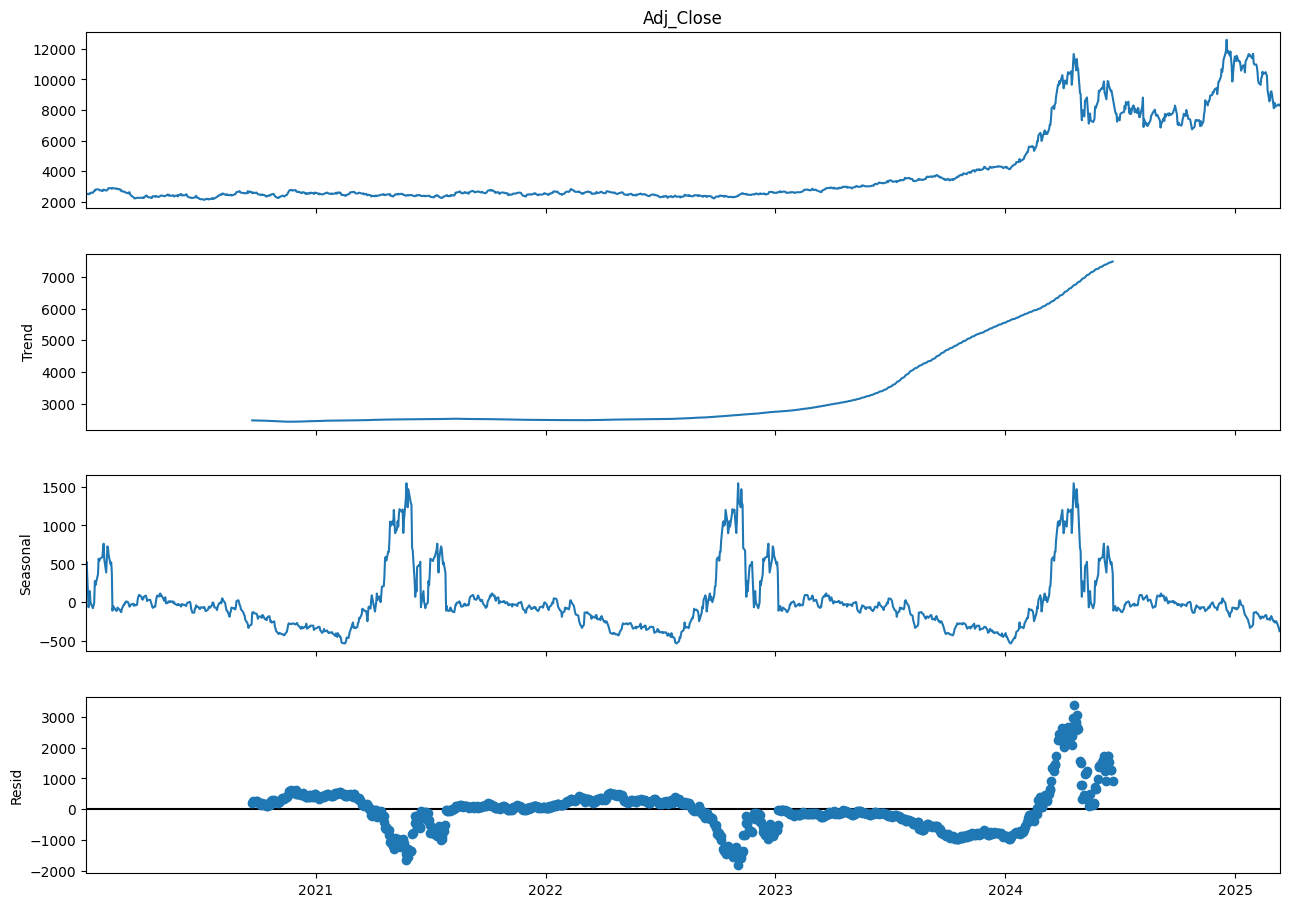

In [19]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Supongamos que usamos la columna 'Adj_Close' ya calculada y que la serie tiene frecuencia diaria.
# Es recomendable que la serie tenga un índice de fecha.
data.set_index('Date', inplace=True)

# Realizamos la descomposición. Se puede usar model="multiplicative" o "additive" según la naturaleza de la serie.
decomposition = seasonal_decompose(data['Adj_Close'], model='additive', period=365)  # period=365 para datos diarios (anual)

# Graficamos los componentes
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

# Restauramos el índice como columna si lo deseas para análisis posteriores
data.reset_index(inplace=True)


## 2. Modelos de Series Temporales: ARIMA/ARIMAX

En esta sección ajustaremos un modelo ARIMA para pronosticar el precio ajustado. Si cuentas con variables exógenas (por ejemplo, datos climáticos), podrías incluirlas para construir un modelo ARIMAX.


                               SARIMAX Results                                
Dep. Variable:          log_Adj_Close   No. Observations:                 1306
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2947.567
Date:                Fri, 14 Mar 2025   AIC                          -5889.134
Time:                        00:59:19   BIC                          -5873.612
Sample:                             0   HQIC                         -5883.311
                               - 1306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5456      0.265     -2.055      0.040      -1.066      -0.025
ma.L1          0.5095      0.273      1.864      0.062      -0.026       1.045
sigma2         0.0006   9.44e-06     67.718      0.0

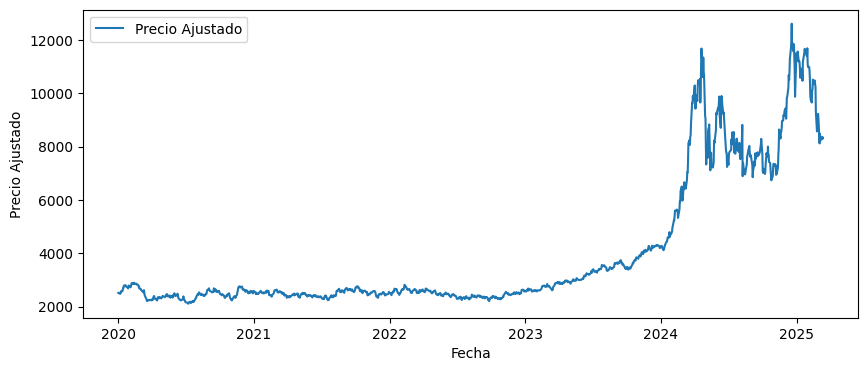

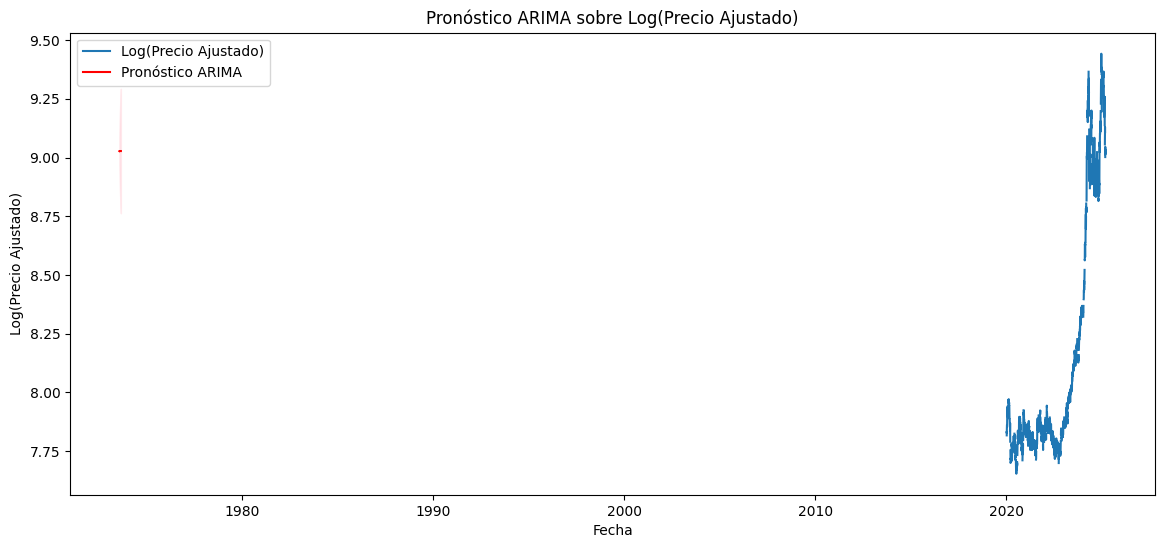

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Desactivamos algunas advertencias para claridad
warnings.filterwarnings("ignore")

# Reiniciamos el índice sin insertar la columna duplicada "Date"
data.reset_index(drop=True, inplace=True)

# Convertir la columna de fecha a datetime usando 'ctmString' y ordenar
data['Date'] = pd.to_datetime(data['ctmString'], format='%b %d, %Y, %I:%M:%S %p')
data.sort_values('Date', inplace=True)

# Establecer 'Date' como índice y definir la frecuencia diaria
data.set_index('Date', inplace=True)
data = data.asfreq('D')

# Calcular el precio ajustado y su logaritmo
data['Adj_Close'] = data['open'] + data['close']
data['log_Adj_Close'] = np.log(data['Adj_Close'])

# Ajustamos un modelo ARIMA(1,1,1) sobre la serie logarítmica (excluyendo NaNs)
model_arima = ARIMA(data['log_Adj_Close'].dropna(), order=(1, 1, 1))
result_arima = model_arima.fit()

# Mostrar el resumen del modelo
print(result_arima.summary())

# Realizamos una predicción a futuro (por ejemplo, 30 días)
forecast = result_arima.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Graficamos la serie original y el pronóstico
plt.figure(figsize=(14, 6))
plt.plot(data['log_Adj_Close'], label='Log(Precio Ajustado)')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Pronóstico ARIMA', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Pronóstico ARIMA sobre Log(Precio Ajustado)')
plt.xlabel('Fecha')
plt.ylabel('Log(Precio Ajustado)')
plt.legend()
plt.show()


## 2. Modelos de Series Temporales: GARCH

Ahora ajustaremos un modelo GARCH(1,1) sobre los rendimientos diarios para modelar la heterocedasticidad (variabilidad condicional) de la serie.


In [22]:
from arch import arch_model

# Asegúrate de que el DataFrame tenga la columna 'Return'
# Aquí usamos la serie de rendimientos que ya calculamos anteriormente (para ello es recomendable restaurar el índice si se cambió)
data.reset_index(inplace=True)
data.set_index('Date', inplace=True)

# Ajustamos un modelo GARCH(1,1) a la serie de rendimientos diarios
garch_model = arch_model(data['Return'].dropna(), vol='GARCH', p=1, q=1)
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())

# Pronosticamos la volatilidad para los próximos 30 días
garch_forecast = garch_result.forecast(horizon=30)
# Extraemos la volatilidad pronosticada (raíz cuadrada de la varianza)
forecast_vol = np.sqrt(garch_forecast.variance.iloc[-1])
print("Pronóstico de volatilidad para los próximos 30 días:")
print(forecast_vol)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3275.87
Distribution:                  Normal   AIC:                          -6543.74
Method:            Maximum Likelihood   BIC:                          -6523.04
                                        No. Observations:                 1305
Date:                Fri, Mar 14 2025   Df Residuals:                     1304
Time:                        00:33:54   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.7923e-04  4.312e-04      1.807  7.076e-02 

## 3. Análisis de Factores Fundamentales

Si dispones de datos climáticos, económicos u otros relacionados (por ejemplo, precios de otros commodities), se pueden explorar relaciones. En este ejemplo se realiza un análisis de correlación.


Correlación entre Precio Ajustado y Clima Index: 0.02


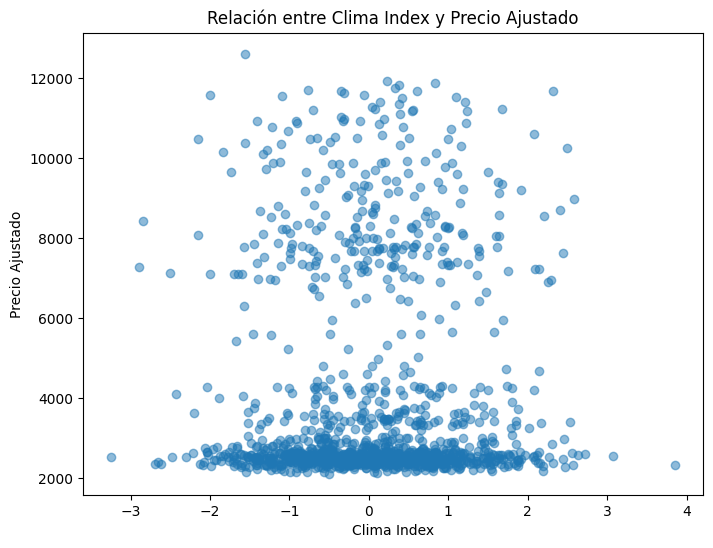

In [23]:
# Supongamos que tienes otra columna llamada "clima_index" en tu DataFrame (agrega o fusiona estos datos según corresponda)
# Aquí se simula un dato extra para ilustrar:
import numpy as np
np.random.seed(42)
data['clima_index'] = np.random.normal(0, 1, len(data))

# Calculamos la correlación entre el precio ajustado y el índice climático
corr_value = data['Adj_Close'].corr(data['clima_index'])
print(f"Correlación entre Precio Ajustado y Clima Index: {corr_value:.2f}")

# También puedes realizar un gráfico de dispersión:
plt.figure(figsize=(8, 6))
plt.scatter(data['clima_index'], data['Adj_Close'], alpha=0.5)
plt.title('Relación entre Clima Index y Precio Ajustado')
plt.xlabel('Clima Index')
plt.ylabel('Precio Ajustado')
plt.show()


## 4. Medidas de Riesgo (VaR, CVaR)

Utilizaremos el método histórico para calcular el VaR y el CVaR de los rendimientos diarios. El VaR representa la pérdida máxima esperada en un horizonte temporal dado y un nivel de confianza (por ejemplo, 95%). El CVaR, o Expected Shortfall, es el promedio de las pérdidas que exceden el VaR.


In [24]:
# Seleccionamos la serie de rendimientos
returns = data['Return'].dropna()

# Definimos el nivel de confianza
confidence_level = 0.95

# Calculamos el VaR histórico: es el percentil 5% para un nivel del 95%
VaR = returns.quantile(1 - confidence_level)
print(f"Value at Risk (VaR) al {int(confidence_level*100)}%: {VaR:.4f}")

# Calculamos el CVaR: el promedio de las pérdidas que superan el VaR
CVaR = returns[returns <= VaR].mean()
print(f"Conditional VaR (CVaR) al {int(confidence_level*100)}%: {CVaR:.4f}")


Value at Risk (VaR) al 95%: -0.0323
Conditional VaR (CVaR) al 95%: -0.0611


## 5. Técnicas de Machine Learning: LSTM

Usaremos un modelo LSTM para predecir el precio ajustado. Primero, prepararemos la serie, luego definiremos y entrenaremos el modelo.


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0032 - val_loss: 0.0299
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1964e-04 - val_loss: 0.0250
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.2408e-04 - val_loss: 0.0321
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.5973e-05 - val_loss: 0.0705
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.3133e-04 - val_loss: 0.0251
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.4112e-04 - val_loss: 0.0403
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.2037e-04 - val_loss: 0.0756
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.0851e-04 - val_loss: 0.0402
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.0502e-04 - val_loss: 0.0282
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.0807e-04 - val_loss: 0.0454
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.7948e-05 - val_loss: 0.0329
Epoch 12/20
32/32 ━━━━━

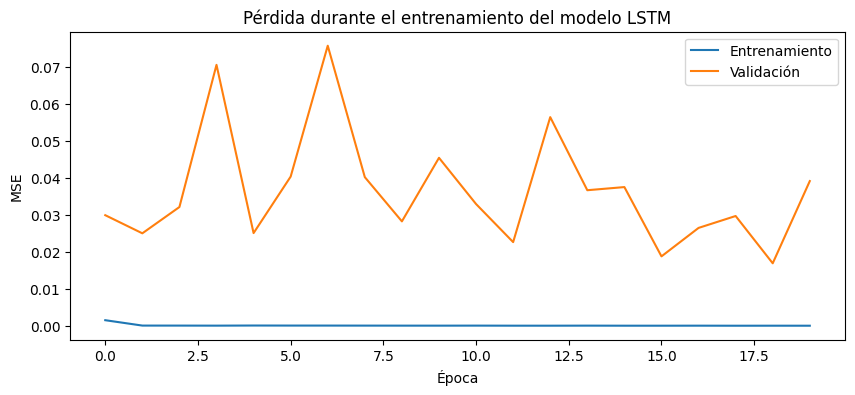

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


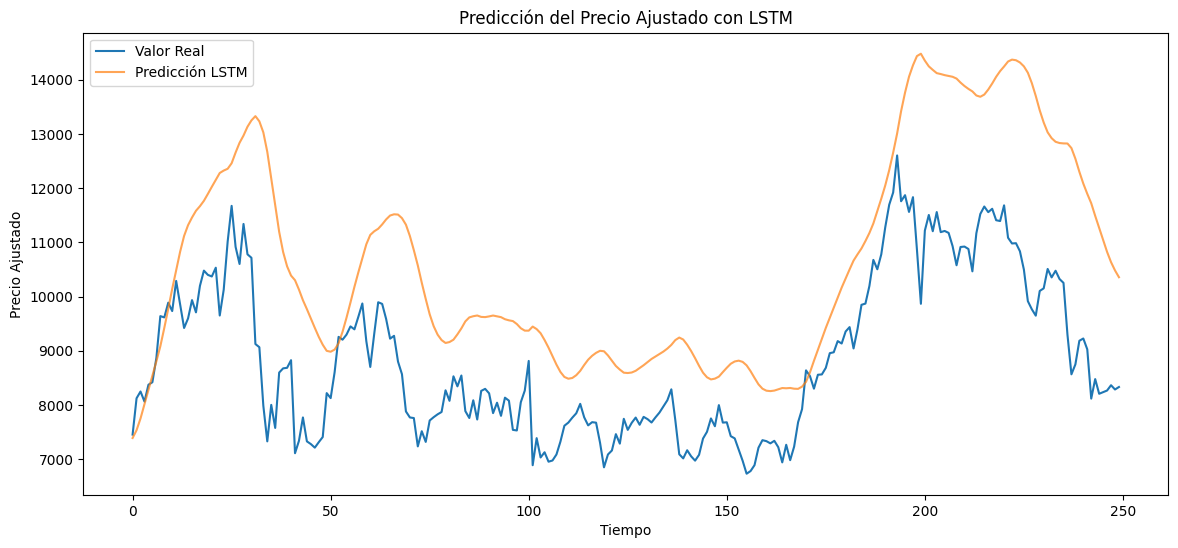

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Para reproducibilidad
np.random.seed(42)

# Usaremos la columna 'Adj_Close' para predecir precios.
data_ml = data.copy()
data_ml.sort_index(inplace=True)  # Nos aseguramos de tener la serie ordenada

# Escalamos la serie entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_ml[['Adj_Close']])

# Definimos la función para crear ventanas de tiempo
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # usamos 60 días para predecir el siguiente
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Dividimos en entrenamiento y prueba (80% entrenamiento)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Definimos el modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Graficamos la pérdida
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento del modelo LSTM')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Realizamos predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Valor Real')
plt.plot(predictions, label='Predicción LSTM', alpha=0.7)
plt.title('Predicción del Precio Ajustado con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.show()


## 6. Automatización y Panel de Control

Utilizando Streamlit, se puede crear un dashboard interactivo que actualice el análisis con datos nuevos y permita visualizar resultados en tiempo real. El siguiente código es un ejemplo básico que puedes adaptar.


In [35]:
def summarize_arima(result_arima):
    """
    Imprime un resumen simplificado de las métricas clave del modelo ARIMA.
    """
    print("=== Resumen del Modelo ARIMA ===")
    # Imprimir resumen completo
    print(result_arima.summary())
    print("\nAIC: {:.4f}".format(result_arima.aic))
    print("BIC: {:.4f}".format(result_arima.bic))
    print("Log Likelihood: {:.4f}".format(result_arima.llf))
    print("\n--------------------------------------\n")


def summarize_garch(garch_result, forecast_vol=None):
    """
    Imprime un resumen simplificado de las métricas clave del modelo GARCH.
    Si se provee forecast_vol, también se muestra el pronóstico de volatilidad.
    """
    print("=== Resumen del Modelo GARCH ===")
    print("Parámetros:")
    print(garch_result.params)
    print("\nLog Likelihood: {:.4f}".format(garch_result.loglikelihood))
    print("AIC: {:.4f}".format(garch_result.aic))
    print("BIC: {:.4f}".format(garch_result.bic))
    
    # Calcular y mostrar la suma de alpha y beta para evaluar la persistencia
    alpha = garch_result.params.get('alpha[1]', np.nan)
    beta = garch_result.params.get('beta[1]', np.nan)
    if not np.isnan(alpha) and not np.isnan(beta):
        print("\nPersistencia (alpha[1] + beta[1]): {:.4f}".format(alpha + beta))
    
    if forecast_vol is not None:
        print("\nPronóstico de Volatilidad para los próximos 30 días:")
        print(forecast_vol)
    
    print("\n--------------------------------------\n")

    
# Ejemplo de uso: Asumiendo que ya has ajustado result_arima y garch_result,
# y que forecast_vol contiene el pronóstico de volatilidad para el modelo GARCH.

# Resumen del modelo ARIMA:
summarize_arima(result_arima)

# Resumen del modelo GARCH:
summarize_garch(garch_result, forecast_vol)


=== Resumen del Modelo ARIMA ===
                               SARIMAX Results                                
Dep. Variable:          log_Adj_Close   No. Observations:                 1306
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2947.567
Date:                Fri, 14 Mar 2025   AIC                          -5889.134
Time:                        01:02:50   BIC                          -5873.612
Sample:                             0   HQIC                         -5883.311
                               - 1306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5456      0.265     -2.055      0.040      -1.066      -0.025
ma.L1          0.5095      0.273      1.864      0.062      -0.026       1.045
sigma2         0.00

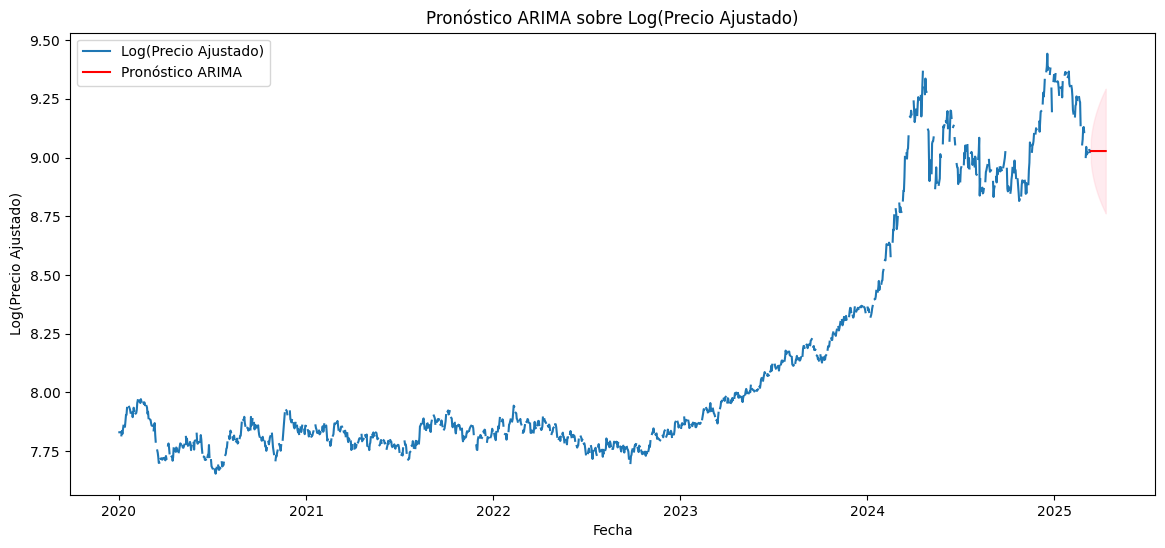

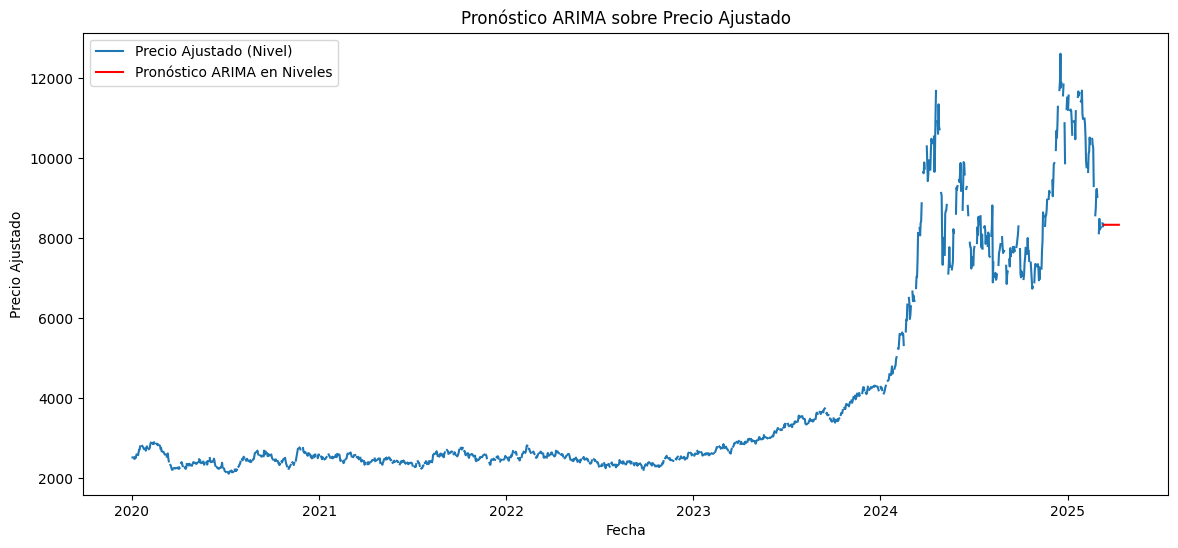

Pronóstico de Volatilidad para los próximos 30 días:
h.01    0.035375
h.02    0.035200
h.03    0.035027
h.04    0.034857
h.05    0.034690
h.06    0.034526
h.07    0.034363
h.08    0.034204
h.09    0.034047
h.10    0.033892
h.11    0.033740
h.12    0.033590
h.13    0.033443
h.14    0.033298
h.15    0.033155
h.16    0.033014
h.17    0.032876
h.18    0.032740
h.19    0.032606
h.20    0.032474
h.21    0.032344
h.22    0.032217
h.23    0.032091
h.24    0.031968
h.25    0.031847
h.26    0.031727
h.27    0.031610
h.28    0.031494
h.29    0.031380
h.30    0.031269
Name: 2025-03-12 00:00:00, dtype: float64


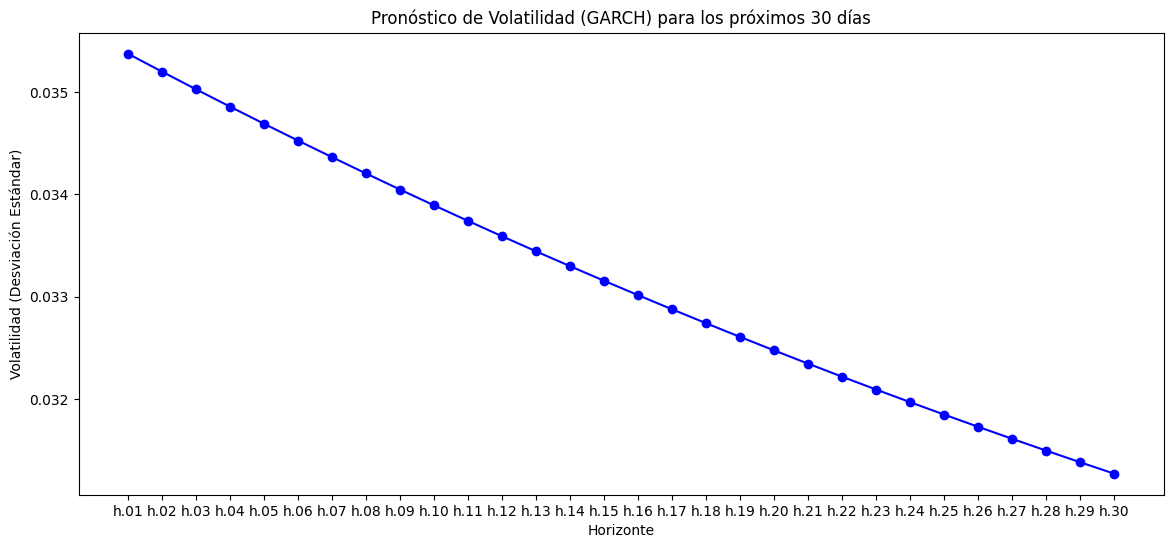

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Número de días que queremos pronosticar
forecast_steps = 30

# 1) PRONÓSTICO CON ARIMA

# Obtenemos el forecast en log(Precio Ajustado)
forecast_arima = result_arima.get_forecast(steps=forecast_steps)
forecast_arima_ci = forecast_arima.conf_int()

# Extraemos la serie pronosticada (log) y definimos un nuevo índice de fechas
predicted_log = forecast_arima.predicted_mean.copy()
last_date = data.index[-1]  # última fecha real de la serie
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=forecast_steps,
                             freq='D')

# Reasignamos el nuevo índice a las series pronosticadas
predicted_log.index = future_index
forecast_arima_ci.index = future_index

# Convertimos el log-pronóstico a niveles
predicted_price = np.exp(predicted_log)

# --- Graficamos el pronóstico en log ---
plt.figure(figsize=(14, 6))
plt.plot(data['log_Adj_Close'], label='Log(Precio Ajustado)')
plt.plot(predicted_log.index, predicted_log, label='Pronóstico ARIMA', color='red')
plt.fill_between(predicted_log.index,
                 forecast_arima_ci.iloc[:, 0],
                 forecast_arima_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Pronóstico ARIMA sobre Log(Precio Ajustado)')
plt.xlabel('Fecha')
plt.ylabel('Log(Precio Ajustado)')
plt.legend()
plt.show()

# --- Graficamos el pronóstico en niveles ---
plt.figure(figsize=(14, 6))
plt.plot(np.exp(data['log_Adj_Close']), label='Precio Ajustado (Nivel)')
plt.plot(predicted_price.index, predicted_price, label='Pronóstico ARIMA en Niveles', color='red')
plt.title('Pronóstico ARIMA sobre Precio Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.show()

# 2) PRONÓSTICO CON GARCH

# Pronosticamos la varianza condicional a 30 pasos (horizon=30)
garch_forecast = garch_result.forecast(horizon=forecast_steps)

# Extraemos la varianza pronosticada y calculamos la volatilidad (raíz cuadrada)
forecast_variance = garch_forecast.variance.iloc[-1]  # varianza pronosticada para cada uno de los 30 pasos
forecast_volatility = np.sqrt(forecast_variance)      # desviación estándar

print("Pronóstico de Volatilidad para los próximos 30 días:")
print(forecast_volatility)

# Graficar la evolución pronosticada de la volatilidad
plt.figure(figsize=(14, 6))
plt.plot(forecast_volatility.index, forecast_volatility, marker='o', linestyle='-', color='blue')
plt.title('Pronóstico de Volatilidad (GARCH) para los próximos 30 días')
plt.xlabel('Horizonte')
plt.ylabel('Volatilidad (Desviación Estándar)')
plt.show()


In [40]:
# Datos iniciales
current_price = 8333.00
stop_loss_price = 7763.82
take_profit_price = 8943.91
money_at_risk = 78  # euros
leverage = 10

# Cálculo del valor notional
notional = money_at_risk * leverage

# Supongamos que 1 contrato equivale al precio actual (8333€)
contracts = notional / current_price

# Diferencias en puntos
risk_points = current_price - stop_loss_price
reward_points = take_profit_price - current_price

# Cálculo del riesgo y ganancia monetaria
monetary_risk = contracts * risk_points
monetary_reward = contracts * reward_points

print("Número de contratos negociados:", contracts)
print("Diferencia en puntos (Stop Loss):", risk_points)
print("Riesgo monetario (Stop Loss): {:.2f}€".format(monetary_risk))
print("Diferencia en puntos (Take Profit):", reward_points)
print("Ganancia potencial (Take Profit): {:.2f}€".format(monetary_reward))
print("Relación Riesgo/Beneficio: {:.2f} : {:.2f}".format(monetary_risk, monetary_reward))


Número de contratos negociados: 0.093603744149766
Diferencia en puntos (Stop Loss): 569.1800000000003
Riesgo monetario (Stop Loss): 53.28€
Diferencia en puntos (Take Profit): 610.9099999999999
Ganancia potencial (Take Profit): 57.18€
Relación Riesgo/Beneficio: 53.28 : 57.18


## Segmentación de la Serie Temporal

Dividimos la serie en dos períodos:
- **Periodo Atípico:** Desde el 1 de enero de 2020 hasta el 31 de diciembre de 2021.
- **Periodo "Normal":** Desde el 1 de enero de 2022 en adelante.

Esto nos permitirá comparar la dinámica y la volatilidad en cada período.


Periodo Normal (2020-2022):
count     756.000000
mean     2475.656085
std       141.126549
min      2109.000000
25%      2374.000000
50%      2469.000000
75%      2574.000000
max      2897.000000
Name: Adj_Close, dtype: float64

Periodo Atípico (2023 en adelante):
count      550.000000
mean      6001.890909
std       2864.563417
min       2562.000000
25%       3381.250000
50%       5279.500000
75%       8247.000000
max      12605.000000
Name: Adj_Close, dtype: float64


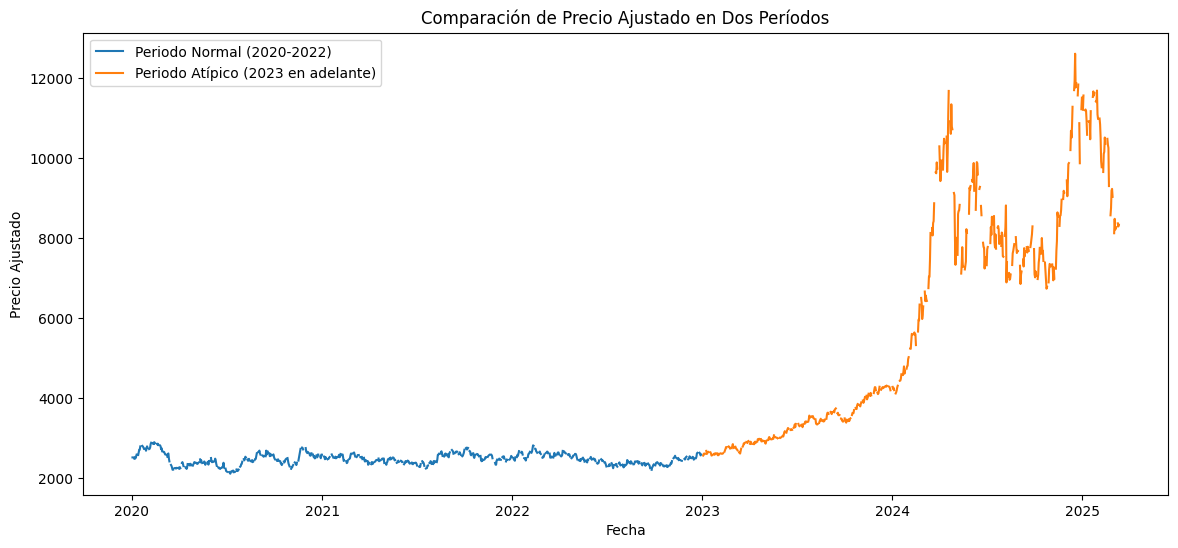

In [45]:
# Asegúrate de que el índice es DateTimeIndex con frecuencia diaria
data = data.asfreq('D')

# Definición de períodos:
# - Periodo Normal: Desde el 1 de enero de 2020 hasta el 31 de diciembre de 2022.
# - Periodo Atípico: Desde el 1 de enero de 2023 en adelante (lo raro).
periodo_normal = data.loc['2020-01-01':'2022-12-31']
periodo_atipico = data.loc['2023-01-01':]

print("Periodo Normal (2020-2022):")
print(periodo_normal['Adj_Close'].describe())
print("\nPeriodo Atípico (2023 en adelante):")
print(periodo_atipico['Adj_Close'].describe())

# Graficamos ambos períodos para visualizarlos
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(periodo_normal.index, periodo_normal['Adj_Close'], label='Periodo Normal (2020-2022)')
plt.plot(periodo_atipico.index, periodo_atipico['Adj_Close'], label='Periodo Atípico (2023 en adelante)')
plt.title('Comparación de Precio Ajustado en Dos Períodos')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.show()


## Modelo ARIMA en Segmentos

Ajustaremos un modelo ARIMA(1,1,1) a la serie logarítmica del Precio Ajustado en cada segmento para ver si existen diferencias en la dinámica entre el período normal (2020-2022) y el atípico (2023 en adelante).



In [46]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Convertimos a logaritmo del Precio Ajustado en ambos segmentos:
periodo_normal['log_Adj_Close'] = np.log(periodo_normal['Adj_Close'])
periodo_atipico['log_Adj_Close'] = np.log(periodo_atipico['Adj_Close'])

# Ajustamos ARIMA(1,1,1) en cada segmento (se omiten NaNs)
model_normal_arima = ARIMA(periodo_normal['log_Adj_Close'].dropna(), order=(1,1,1))
result_normal_arima = model_normal_arima.fit()

model_atipico_arima = ARIMA(periodo_atipico['log_Adj_Close'].dropna(), order=(1,1,1))
result_atipico_arima = model_atipico_arima.fit()

print("=== Modelo ARIMA para Periodo Normal (2020-2022) ===")
print(result_normal_arima.summary())
print("\n=== Modelo ARIMA para Periodo Atípico (2023 en adelante) ===")
print(result_atipico_arima.summary())


=== Modelo ARIMA para Periodo Normal (2020-2022) ===
                               SARIMAX Results                                
Dep. Variable:          log_Adj_Close   No. Observations:                  756
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2043.101
Date:                Fri, 14 Mar 2025   AIC                          -4080.203
Time:                        01:24:38   BIC                          -4066.322
Sample:                             0   HQIC                         -4074.856
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2449      0.653      0.375      0.708      -1.034       1.524
ma.L1         -0.1905      0.662     -0.288      0.773      -1.487       1.106

## Modelo GARCH en Segmentos

Ajustaremos un modelo GARCH(1,1) a la serie de retornos diarios (calculados a partir de los precios ajustados) en cada segmento, para evaluar la volatilidad y su persistencia en ambos períodos.


In [47]:
from arch import arch_model

# Calculamos los retornos diarios para cada segmento
periodo_normal['Return'] = np.log(periodo_normal['Adj_Close'] / periodo_normal['Adj_Close'].shift(1))
periodo_atipico['Return'] = np.log(periodo_atipico['Adj_Close'] / periodo_atipico['Adj_Close'].shift(1))

# Ajustamos modelo GARCH(1,1) en cada segmento
garch_normal = arch_model(periodo_normal['Return'].dropna(), vol='GARCH', p=1, q=1)
garch_result_normal = garch_normal.fit(disp='off')

garch_atipico = arch_model(periodo_atipico['Return'].dropna(), vol='GARCH', p=1, q=1)
garch_result_atipico = garch_atipico.fit(disp='off')

print("=== Modelo GARCH para Periodo Normal (2020-2022) ===")
print(garch_result_normal.summary())
print("\n=== Modelo GARCH para Periodo Atípico (2023 en adelante) ===")
print(garch_result_atipico.summary())


=== Modelo GARCH para Periodo Normal (2020-2022) ===
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1617.20
Distribution:                  Normal   AIC:                          -3226.40
Method:            Maximum Likelihood   BIC:                          -3208.84
                                        No. Observations:                  596
Date:                Fri, Mar 14 2025   Df Residuals:                      595
Time:                        01:25:02   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu

## Comparación de Pronósticos de Volatilidad

Pronosticaremos la volatilidad a 30 días en cada segmento y compararemos los resultados para ver cómo difiere la evolución de la volatilidad entre el período normal y el atípico.


Pronóstico de Volatilidad para Periodo Normal (2020-2022):
h.01    0.015748
h.02    0.016048
h.03    0.016065
h.04    0.016066
h.05    0.016066
h.06    0.016066
h.07    0.016066
h.08    0.016066
h.09    0.016066
h.10    0.016066
h.11    0.016066
h.12    0.016066
h.13    0.016066
h.14    0.016066
h.15    0.016066
h.16    0.016066
h.17    0.016066
h.18    0.016066
h.19    0.016066
h.20    0.016066
h.21    0.016066
h.22    0.016066
h.23    0.016066
h.24    0.016066
h.25    0.016066
h.26    0.016066
h.27    0.016066
h.28    0.016066
h.29    0.016066
h.30    0.016066
Name: 2022-12-30 00:00:00, dtype: float64

Pronóstico de Volatilidad para Periodo Atípico (2023 en adelante):
h.01    0.024391
h.02    0.024554
h.03    0.024712
h.04    0.024867
h.05    0.025018
h.06    0.025164
h.07    0.025307
h.08    0.025447
h.09    0.025582
h.10    0.025715
h.11    0.025844
h.12    0.025970
h.13    0.026093
h.14    0.026212
h.15    0.026329
h.16    0.026443
h.17    0.026554
h.18    0.026663
h.19    0.02676

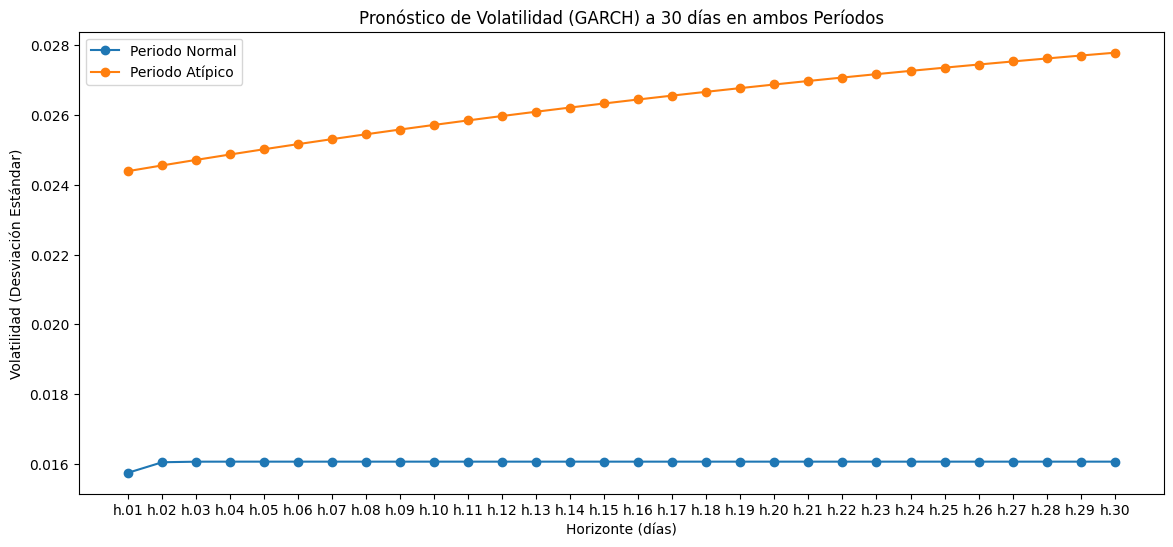

In [48]:
# Pronóstico de volatilidad para 30 días en cada segmento

# Para el periodo normal:
garch_forecast_normal = garch_result_normal.forecast(horizon=30)
forecast_variance_normal = garch_forecast_normal.variance.iloc[-1]
forecast_vol_normal = np.sqrt(forecast_variance_normal)

# Para el periodo atípico:
garch_forecast_atipico = garch_result_atipico.forecast(horizon=30)
forecast_variance_atipico = garch_forecast_atipico.variance.iloc[-1]
forecast_vol_atipico = np.sqrt(forecast_variance_atipico)

print("Pronóstico de Volatilidad para Periodo Normal (2020-2022):")
print(forecast_vol_normal)
print("\nPronóstico de Volatilidad para Periodo Atípico (2023 en adelante):")
print(forecast_vol_atipico)

# Graficar ambos pronósticos para comparación:
plt.figure(figsize=(14, 6))
plt.plot(forecast_vol_normal.index, forecast_vol_normal, marker='o', linestyle='-', label='Periodo Normal')
plt.plot(forecast_vol_atipico.index, forecast_vol_atipico, marker='o', linestyle='-', label='Periodo Atípico')
plt.title('Pronóstico de Volatilidad (GARCH) a 30 días en ambos Períodos')
plt.xlabel('Horizonte (días)')
plt.ylabel('Volatilidad (Desviación Estándar)')
plt.legend()
plt.show()


=== Modelo ARIMA (2,1,2) Entrenado ===
                               SARIMAX Results                                
Dep. Variable:          log_Adj_Close   No. Observations:                  550
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1081.133
Date:                Fri, 14 Mar 2025   AIC                          -2152.266
Time:                        01:34:15   BIC                          -2130.725
Sample:                             0   HQIC                         -2143.847
                                - 550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1569      0.023    -50.224      0.000      -1.202      -1.112
ar.L2         -0.9607      0.021    -45.303      0.000      -1.002      -0.919
ma.L1        

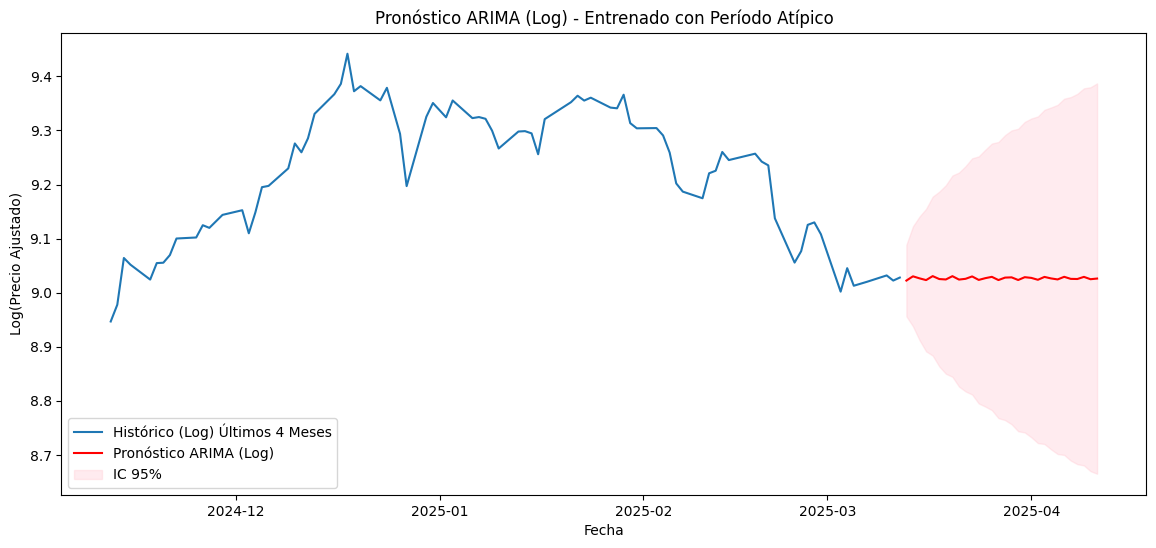

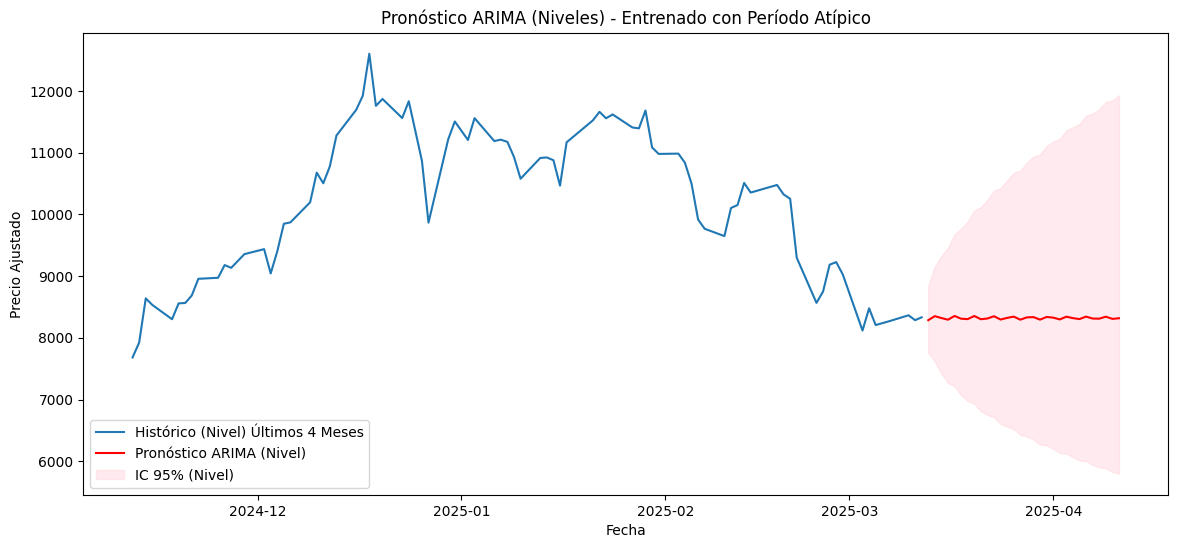


Pronóstico de Volatilidad para los próximos 30 días (GARCH):
h.01    0.030242
h.02    0.030323
h.03    0.030402
h.04    0.030479
h.05    0.030554
h.06    0.030628
h.07    0.030700
h.08    0.030771
h.09    0.030840
h.10    0.030907
h.11    0.030973
h.12    0.031037
h.13    0.031100
h.14    0.031162
h.15    0.031222
h.16    0.031281
h.17    0.031339
h.18    0.031395
h.19    0.031451
h.20    0.031505
h.21    0.031557
h.22    0.031609
h.23    0.031660
h.24    0.031709
h.25    0.031758
h.26    0.031805
h.27    0.031851
h.28    0.031897
h.29    0.031941
h.30    0.031985
Name: 2025-03-12 00:00:00, dtype: float64


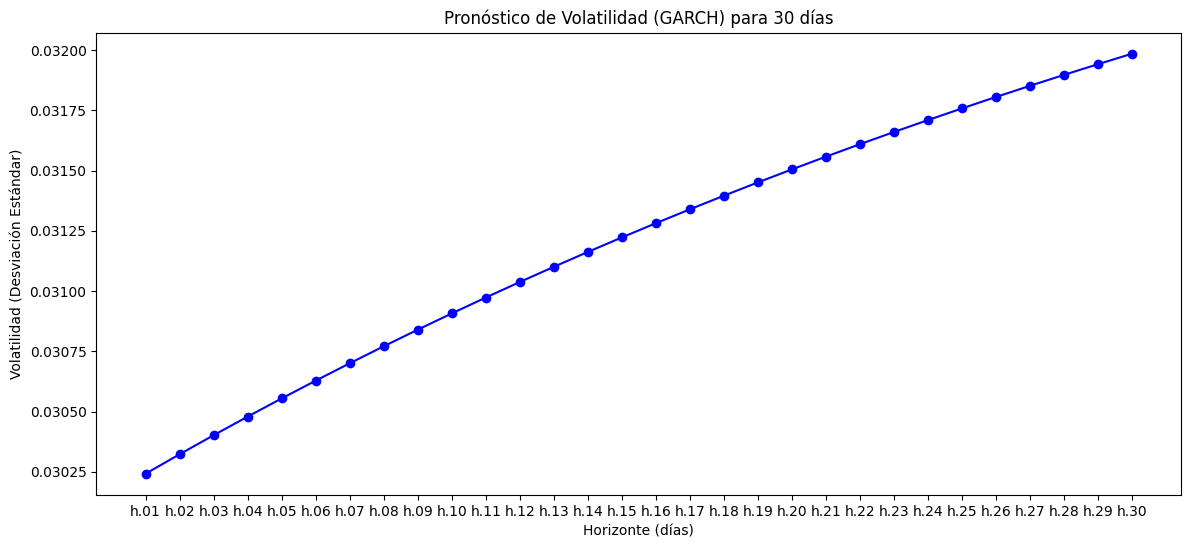

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import warnings

warnings.filterwarnings("ignore")

# === 1) Preparar los Datos ===
# Asegurarse de que el DataFrame 'data' tiene un índice de fecha y frecuencia diaria.
data = data.asfreq('D')

# Definir el período atípico: desde el 1 de enero de 2023 hasta la fecha actual.
periodo_atipico = data.loc['2023-01-01':].copy()

# Calcular el precio ajustado (ya que en análisis anterior se definió como: open + close)
periodo_atipico['Adj_Close'] = periodo_atipico['open'] + periodo_atipico['close']

# Calcular el logaritmo del precio ajustado
periodo_atipico['log_Adj_Close'] = np.log(periodo_atipico['Adj_Close'])
periodo_atipico.dropna(inplace=True)

# === 2) Entrenar el Modelo ARIMA con el mejor orden (2,1,2) ===
# Usamos el modelo ARIMA(2,1,2) ya encontrado en la búsqueda
model_arima = ARIMA(periodo_atipico['log_Adj_Close'], order=(2,1,2))
result_arima = model_arima.fit()
print("=== Modelo ARIMA (2,1,2) Entrenado ===")
print(result_arima.summary())

# === 3) Entrenar un Modelo GARCH(1,1) para la volatilidad ===
# Calcular retornos diarios para la serie (diferencia logarítmica)
periodo_atipico['Return'] = periodo_atipico['log_Adj_Close'].diff()
periodo_atipico.dropna(inplace=True)

garch_model = arch_model(periodo_atipico['Return'], vol='GARCH', p=1, q=1)
garch_result = garch_model.fit(disp='off')
print("\n=== Modelo GARCH (1,1) Entrenado ===")
print(garch_result.summary())

# === 4) Definir los últimos 4 meses para iniciar el pronóstico ===
cutoff_date = periodo_atipico.index[-1] - pd.DateOffset(months=4)
last_4_months_data = periodo_atipico.loc[cutoff_date:].copy()
start_forecast_date = last_4_months_data.index[-1]
print("\nÚltima fecha de los últimos 4 meses:", start_forecast_date.date())

# === 5) Pronóstico ARIMA de 30 días ===
forecast_steps = 30
forecast_result = result_arima.get_forecast(steps=forecast_steps)
forecast_ci = forecast_result.conf_int()

# Reasignar el índice del forecast para que comience el día siguiente a start_forecast_date
future_index = pd.date_range(start=start_forecast_date + pd.Timedelta(days=1),
                             periods=forecast_steps,
                             freq='D')

forecast_mean_log = forecast_result.predicted_mean.copy()
forecast_mean_log.index = future_index
forecast_ci.index = future_index

# Graficar el pronóstico en logaritmos
plt.figure(figsize=(14, 6))
plt.plot(last_4_months_data.index, last_4_months_data['log_Adj_Close'], label='Histórico (Log) Últimos 4 Meses')
plt.plot(forecast_mean_log.index, forecast_mean_log, label='Pronóstico ARIMA (Log)', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='IC 95%')
plt.title('Pronóstico ARIMA (Log) - Entrenado con Período Atípico')
plt.xlabel('Fecha')
plt.ylabel('Log(Precio Ajustado)')
plt.legend()
plt.show()

# Transformar el pronóstico a niveles
forecast_levels = np.exp(forecast_mean_log)
ci_lower = np.exp(forecast_ci.iloc[:, 0])
ci_upper = np.exp(forecast_ci.iloc[:, 1])

plt.figure(figsize=(14, 6))
plt.plot(last_4_months_data.index, np.exp(last_4_months_data['log_Adj_Close']), label='Histórico (Nivel) Últimos 4 Meses')
plt.plot(forecast_levels.index, forecast_levels, label='Pronóstico ARIMA (Nivel)', color='red')
plt.fill_between(forecast_levels.index, ci_lower, ci_upper, color='pink', alpha=0.3, label='IC 95% (Nivel)')
plt.title('Pronóstico ARIMA (Niveles) - Entrenado con Período Atípico')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.show()

# === 6) Pronóstico de Volatilidad con GARCH para 30 días ===
garch_forecast = garch_result.forecast(horizon=forecast_steps)
forecast_variance = garch_forecast.variance.iloc[-1]  # Varianza pronosticada para cada paso
forecast_volatility = np.sqrt(forecast_variance)       # Volatilidad = raíz cuadrada de la varianza

print("\nPronóstico de Volatilidad para los próximos 30 días (GARCH):")
print(forecast_volatility)

# Graficar la evolución pronosticada de la volatilidad
plt.figure(figsize=(14, 6))
plt.plot(forecast_volatility.index, forecast_volatility, marker='o', linestyle='-', color='blue')
plt.title('Pronóstico de Volatilidad (GARCH) para 30 días')
plt.xlabel('Horizonte (días)')
plt.ylabel('Volatilidad (Desviación Estándar)')
plt.show()


In [55]:
import numpy as np

def calcular_apuesta(
    capital_disponible,
    apalancamiento,
    precio_actual,
    stop_loss_price,
    take_profit_price,
    max_riesgo_porcentaje=0.02
):
    """
    Calcula la posición (número de contratos), el riesgo monetario y la ganancia potencial.
    
    Parámetros:
    -----------
    capital_disponible : float
        Capital total que estás dispuesto a usar para la operación (por ejemplo, 1000€).
    apalancamiento : float
        Apalancamiento (por ejemplo, 1:10 => 10).
    precio_actual : float
        Precio actual o precio de entrada.
    stop_loss_price : float
        Nivel de stop loss calculado.
    take_profit_price : float
        Nivel de take profit calculado.
    max_riesgo_porcentaje : float
        Porcentaje máximo de tu capital que estás dispuesto a arriesgar (ej. 2% => 0.02).
    
    Retorna:
    --------
    dict : {
        'posicion_nominal': float,
        'num_contratos': float,
        'riesgo_monetario': float,
        'ganancia_potencial': float,
        'relacion_riesgo_beneficio': float
    }
    """

    # 1) Riesgo monetario máximo (en €)
    riesgo_monetario_maximo = capital_disponible * max_riesgo_porcentaje
    
    # 2) Posición nominal con apalancamiento
    posicion_nominal = capital_disponible * apalancamiento
    
    # 3) Validaciones básicas
    if stop_loss_price >= precio_actual:
        raise ValueError("El stop loss debe ser menor que el precio actual para una posición larga.")
    if take_profit_price <= precio_actual:
        raise ValueError("El take profit debe ser mayor que el precio actual para una posición larga.")
    
    # 4) Diferencia en puntos hasta el stop loss
    diff_stop = precio_actual - stop_loss_price
    
    # Número de contratos para no superar el riesgo máximo
    num_contratos_riesgo = riesgo_monetario_maximo / diff_stop
    
    # Número de contratos basado en la posición nominal
    num_contratos_nominal = posicion_nominal / precio_actual
    
    # El número de contratos final es el mínimo de ambos
    num_contratos = min(num_contratos_riesgo, num_contratos_nominal)
    
    # 5) Cálculo de riesgo monetario y ganancia potencial
    riesgo_monetario = num_contratos * diff_stop  # si se activa el stop
    diff_tp = take_profit_price - precio_actual
    ganancia_potencial = num_contratos * diff_tp
    
    # 6) Relación Riesgo/Beneficio
    if riesgo_monetario > 0:
        relacion_riesgo_beneficio = ganancia_potencial / riesgo_monetario
    else:
        relacion_riesgo_beneficio = np.inf
    
    return {
        'posicion_nominal': posicion_nominal,
        'num_contratos': num_contratos,
        'riesgo_monetario': riesgo_monetario,
        'ganancia_potencial': ganancia_potencial,
        'relacion_riesgo_beneficio': relacion_riesgo_beneficio
    }

if __name__ == "__main__":
    # =======================================
    # Resultados de las simulaciones previas
    # =======================================
    # 1) Pronóstico ARIMA: precio ~ 8100
    predicted_price_arima = 8100.0
    
    # 2) Pronóstico GARCH: volatilidad diaria ~ 3.5% (0.035)
    predicted_vol_garch = 0.035
    
    # Elegimos k=2 desviaciones estándar
    k = 2
    
    # Cálculo del stop loss y take profit (forma exponencial)
    stop_loss = predicted_price_arima * np.exp(-k * predicted_vol_garch)
    take_profit = predicted_price_arima * np.exp(k * predicted_vol_garch)
    
    # Mostramos estos niveles
    print("=== Niveles Calculados con Simulaciones Previas ===")
    print(f"Precio ARIMA pronosticado: {predicted_price_arima:.2f}")
    print(f"Volatilidad GARCH pronosticada: {predicted_vol_garch:.3f}")
    print(f"Stop Loss (2σ): {stop_loss:.2f}")
    print(f"Take Profit (2σ): {take_profit:.2f}\n")
    
    # ================================
    # Cálculo de la Apuesta
    # ================================
    capital = 1000.0           # euros de capital disponible
    apal = 10                  # apalancamiento 1:10
    max_riesgo_pct = 0.02      # arriesgar 2% del capital
    
    # Usamos la función calcular_apuesta
    resultado = calcular_apuesta(
        capital_disponible=capital,
        apalancamiento=apal,
        precio_actual=predicted_price_arima,
        stop_loss_price=stop_loss,
        take_profit_price=take_profit,
        max_riesgo_porcentaje=max_riesgo_pct
    )
    
    # ================================
    # Reporte Final
    # ================================
    print("=== Resultado de la Apuesta ===")
    print(f"Posición Nominal (con apalancamiento): {resultado['posicion_nominal']:.2f} €")
    print(f"Número de Contratos: {resultado['num_contratos']:.4f}")
    print(f"Riesgo Monetario (Stop Loss): {resultado['riesgo_monetario']:.2f} €")
    print(f"Ganancia Potencial (Take Profit): {resultado['ganancia_potencial']:.2f} €")
    print(f"Relación Riesgo/Beneficio: {resultado['relacion_riesgo_beneficio']:.2f}")


=== Niveles Calculados con Simulaciones Previas ===
Precio ARIMA pronosticado: 8100.00
Volatilidad GARCH pronosticada: 0.035
Stop Loss (2σ): 7552.39
Take Profit (2σ): 8687.32

=== Resultado de la Apuesta ===
Posición Nominal (con apalancamiento): 10000.00 €
Número de Contratos: 0.0365
Riesgo Monetario (Stop Loss): 20.00 €
Ganancia Potencial (Take Profit): 21.45 €
Relación Riesgo/Beneficio: 1.07



=== Resultados Markov Switching (AR(1)) ===
                         Markov Switching Model Results                         
Dep. Variable:                   Return   No. Observations:                  427
Model:             MarkovAutoregression   Log Likelihood                1000.389
Date:                  Fri, 14 Mar 2025   AIC                          -1984.779
Time:                          01:56:23   BIC                          -1952.324
Sample:                               0   HQIC                         -1971.960
                                  - 427                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      2.526      0.012       0.000    

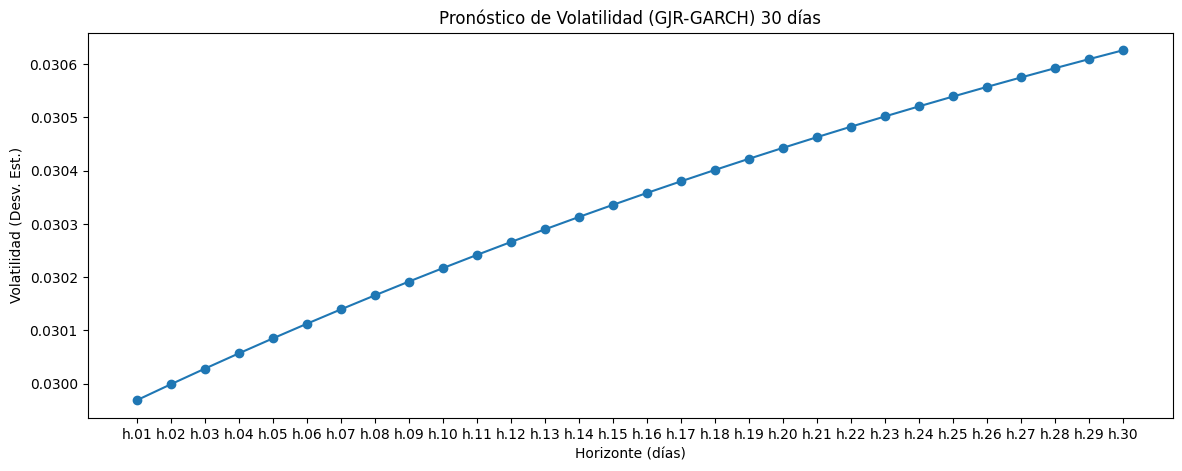

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools

warnings.filterwarnings("ignore")

##############################################
# 1) CARGA Y PREPARACIÓN DE DATOS
##############################################
def cargar_datos(filepath, start_date='2023-01-01'):
    """
    Carga datos desde un archivo Excel, asume que existen las columnas 'ctmString', 'open' y 'close'.
    Crea 'Adj_Close' = open + close, el logaritmo de 'Adj_Close' y los retornos.
    Retorna un DataFrame con frecuencia diaria.
    """
    data = pd.read_excel(filepath)
    data['Date'] = pd.to_datetime(data['ctmString'], format='%b %d, %Y, %I:%M:%S %p', errors='coerce')
    data.sort_values('Date', inplace=True)
    data.set_index('Date', inplace=True)
    
    data = data.asfreq('D')  # Frecuencia diaria
    data = data.loc[start_date:].copy()
    
    # Precio ajustado
    data['Adj_Close'] = data['open'] + data['close']
    data['log_Adj_Close'] = np.log(data['Adj_Close'])
    data['Return'] = data['log_Adj_Close'].diff()
    data.dropna(inplace=True)
    return data

##############################################
# 2) MODELO DE MARKOV SWITCHING (MEDIA) CON MarkovAutoregression
##############################################
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression

def ajustar_markov_switching(series, k_regimes=2, order=1):
    """
    Ajusta un modelo de Markov Switching AR(1) a la serie usando MarkovAutoregression.
    Parámetros:
      - series: Serie temporal (pandas Series) a modelar.
      - k_regimes: Número de regímenes (por defecto 2).
      - order: Orden autoregresivo (por defecto 1).
    Retorna:
      - res_ms: Resultado ajustado del modelo.
    """
    mod_ms = MarkovAutoregression(series, k_regimes=k_regimes, order=order, switching_ar=True,
                                   switching_variance=True, trend='c')
    res_ms = mod_ms.fit(em_iter=50, search_reps=20)
    return res_ms

##############################################
# 3) EXTRAER RESIDUOS DEL MODELO MARKOV SWITCHING
##############################################
def obtener_residuos_markov(res_ms, series):
    """
    Calcula residuos como la diferencia entre la serie original y la predicción (media condicional)
    del modelo Markov Switching.
    """
    fitted_vals = res_ms.predict()
    resid = series - fitted_vals
    return resid

##############################################
# 4) MODELO GJR-GARCH CON DISTRIBUCIÓN T
##############################################
from arch import arch_model

def ajustar_gjr_garch_t(residuos):
    """
    Ajusta un modelo GJR-GARCH(1,1) con distribución t-student a la serie de residuos.
    """
    gjr = arch_model(residuos, p=1, o=1, q=1, vol='GARCH', dist='t')
    res_gjr = gjr.fit(disp='off')
    return res_gjr

##############################################
# 5) PRONÓSTICO CONJUNTO
##############################################
def pronostico_markov_switching(res_ms, steps=30):
    """
    Pronóstico de la media condicional usando el modelo de Markov Switching.
    Se obtiene una estimación naive basada en la media estacionaria de cada régimen, ponderada
    por la probabilidad filtrada del último periodo.
    """
    # Probabilidades del último periodo
    last_probs = res_ms.filtered_marginal_probabilities.iloc[-1].values
    means_by_regime = []
    k_regimes = res_ms.k_regimes

    for regime in range(k_regimes):
        # Intenta obtener el parámetro "intercept[regime]"; si no existe, prueba con "const[regime]"
        param_name = f'intercept[{regime}]'
        if param_name not in res_ms.params.index:
            param_name = f'const[{regime}]'
        intercept = res_ms.params[param_name]
        ar1 = res_ms.params.get(f'ar.L1[{regime}]', 0.0)
        if abs(ar1) < 1:
            mean_regime = intercept / (1 - ar1)
        else:
            mean_regime = intercept
        means_by_regime.append(mean_regime)
    
    weighted_mean = sum(p * m for p, m in zip(last_probs, means_by_regime))
    forecast_ms = np.array([weighted_mean] * steps)
    return forecast_ms

def pronostico_gjr_garch_t(res_gjr, steps=30):
    """
    Pronóstico de volatilidad usando el modelo GJR-GARCH(1,1) con distribución t.
    Retorna la volatilidad pronosticada (raíz de la varianza).
    """
    forecast = res_gjr.forecast(horizon=steps)
    var_ = forecast.variance.iloc[-1]
    vol_ = np.sqrt(var_)
    return vol_

##############################################
# 6) (OPCIONAL) ROLLING FORECAST / BACKTEST
##############################################
# (Se omite en este script avanzado por la alta complejidad computacional)

##############################################
# 7) CÁLCULO DE STOP LOSS, TAKE PROFIT Y APUESTA
##############################################
def calcular_niveles_stop_tp(precio, vol, k=2):
    """
    Calcula los niveles de Stop Loss y Take Profit basados en la aproximación logarítmica:
      Stop Loss = precio * exp(-k * vol)
      Take Profit = precio * exp(k * vol)
    """
    stop_loss = precio * np.exp(-k * vol)
    take_profit = precio * np.exp(k * vol)
    return stop_loss, take_profit

def calcular_apuesta(capital, apalancamiento, precio, stop_loss, take_profit, max_riesgo_pct=0.02):
    """
    Calcula la posición (número de contratos), riesgo monetario y ganancia potencial.
    Se asume que se arriesga un porcentaje máximo del capital (por ejemplo, 2%).
    """
    riesgo_max = capital * max_riesgo_pct
    diff_stop = precio - stop_loss
    num_contratos_riesgo = riesgo_max / diff_stop
    posicion_nominal = capital * apalancamiento
    num_contratos_nominal = posicion_nominal / precio
    num_contratos = min(num_contratos_riesgo, num_contratos_nominal)
    riesgo_monetario = num_contratos * diff_stop
    diff_tp = take_profit - precio
    ganancia_pot = num_contratos * diff_tp
    rr = ganancia_pot / riesgo_monetario if riesgo_monetario > 0 else np.inf
    return {
        'num_contratos': num_contratos,
        'riesgo_monetario': riesgo_monetario,
        'ganancia_potencial': ganancia_pot,
        'relacion_riesgo_beneficio': rr
    }

##############################################
# 8) SCRIPT PRINCIPAL
##############################################
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    
    # 8.1) Carga de datos (ajusta la ruta del archivo)
    filepath = "/Users/charly_1/Documents/GitHub/crop_analysis/data_inputs/historical_data.xlsx"
    data = cargar_datos(filepath, start_date='2023-01-01')
    
    # 8.2) Ajuste del modelo Markov Switching en la serie de Return usando MarkovAutoregression
    res_ms = ajustar_markov_switching(data['Return'], k_regimes=2, order=1)
    print("\n=== Resultados Markov Switching (AR(1)) ===")
    print(res_ms.summary())
    
    # 8.3) Obtener residuos del modelo Markov Switching y ajustar el modelo GJR-GARCH con distribución t
    ms_resid = data['Return'] - res_ms.predict()
    res_gjr = ajustar_gjr_garch_t(ms_resid.dropna())
    print("\n=== Resultados GJR-GARCH con distribución t ===")
    print(res_gjr.summary())
    
    # 8.4) Pronóstico conjunto a 30 días:
    steps = 30
    forecast_ms = pronostico_markov_switching(res_ms, steps=steps)
    forecast_vol = pronostico_gjr_garch_t(res_gjr, steps=steps)
    
    # Supongamos que el precio actual es el último 'Adj_Close'
    precio_actual = data['Adj_Close'].iloc[-1]
    
    # Para obtener el precio esperado del día 1, usamos el pronóstico de Markov Switching (que es un cambio en Return)
    log_price_day1 = np.log(precio_actual) + forecast_ms[0]
    price_day1 = np.exp(log_price_day1)
    
    # Tomamos la volatilidad pronosticada del día 1 (primer paso)
    day1_vol = forecast_vol.iloc[0]
    
    # 8.5) Cálculo de niveles de Stop Loss y Take Profit (con k=2 desviaciones)
    stop_loss, take_profit = calcular_niveles_stop_tp(price_day1, day1_vol, k=2)
    
    print(f"\nPrecio esperado (día 1) ~ {price_day1:.2f}")
    print(f"Volatilidad esperada (día 1) ~ {day1_vol:.4f}")
    print(f"Stop Loss (2σ): {stop_loss:.2f}")
    print(f"Take Profit (2σ): {take_profit:.2f}")
    
    # 8.6) Cálculo de la apuesta
    resultado_apuesta = calcular_apuesta(
        capital=1000.0,
        apalancamiento=10,
        precio=price_day1,
        stop_loss=stop_loss,
        take_profit=take_profit,
        max_riesgo_pct=0.02
    )
    
    print("\n=== Resultado de la Apuesta con Modelos Avanzados ===")
    for key, value in resultado_apuesta.items():
        print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")
    
    # 8.7) Graficar pronóstico de volatilidad (GJR-GARCH) para 30 días
    plt.figure(figsize=(14,5))
    plt.plot(forecast_vol.index, forecast_vol.values, marker='o', linestyle='-')
    plt.title("Pronóstico de Volatilidad (GJR-GARCH) 30 días")
    plt.xlabel("Horizonte (días)")
    plt.ylabel("Volatilidad (Desv. Est.)")
    plt.show()



=== Resultados Markov Switching (AR(1)) ===
                         Markov Switching Model Results                         
Dep. Variable:                   Return   No. Observations:                  427
Model:             MarkovAutoregression   Log Likelihood                1000.389
Date:                  Fri, 14 Mar 2025   AIC                          -1984.779
Time:                          02:20:25   BIC                          -1952.324
Sample:                               0   HQIC                         -1971.960
                                  - 427                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.003      1.495      0.135      -0.001    

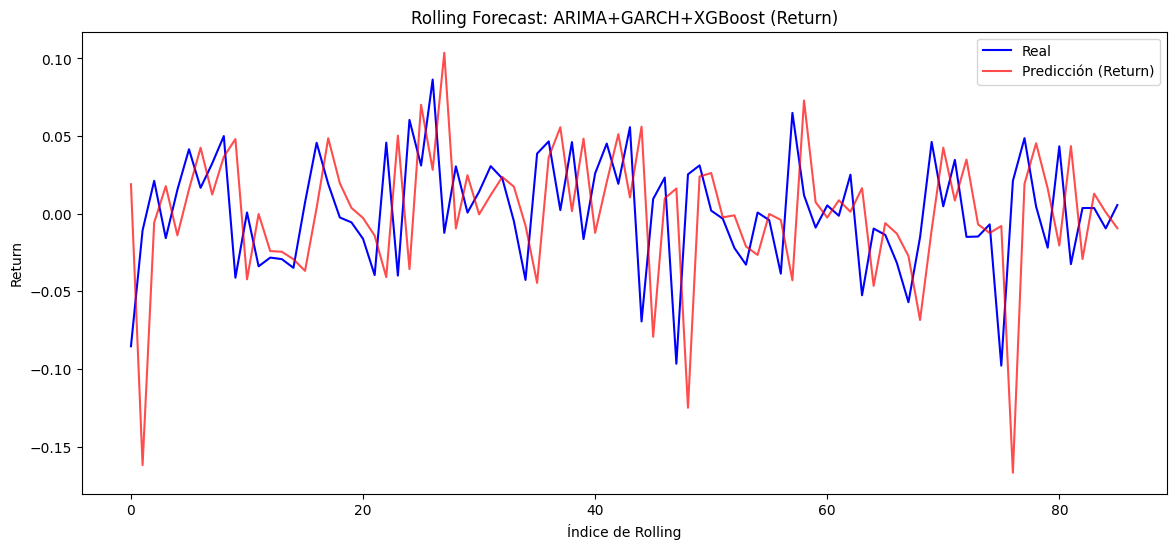

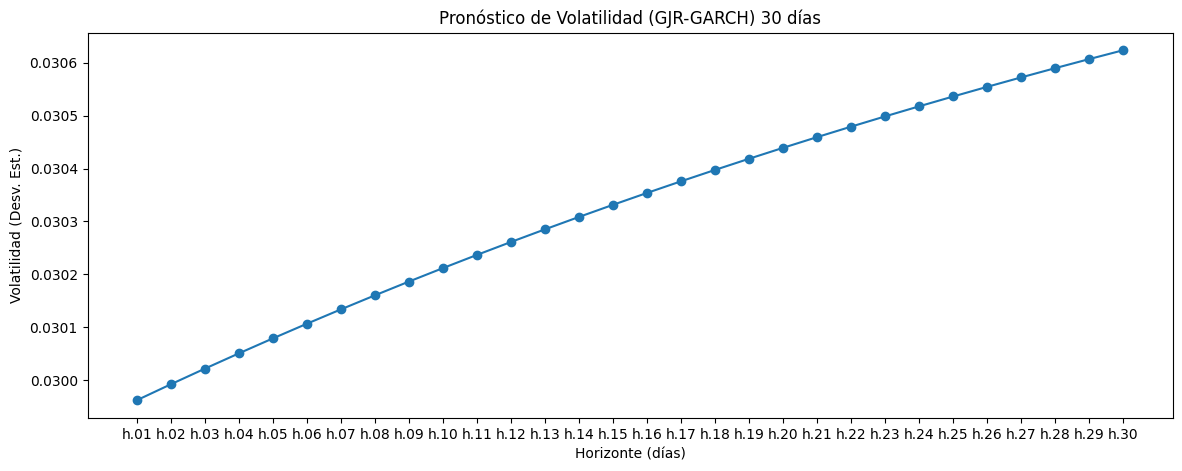

In [74]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb

##############################################
# 1) CARGA Y PREPARACIÓN DE DATOS
##############################################
def cargar_datos(filepath, start_date='2023-01-01'):
    """
    Carga datos desde un archivo Excel, asume que existen las columnas 'ctmString', 'open' y 'close'.
    Crea 'Adj_Close' = open + close, el logaritmo de 'Adj_Close' y los retornos.
    Retorna un DataFrame con frecuencia diaria a partir de 'start_date'.
    """
    data = pd.read_excel(filepath)
    data['Date'] = pd.to_datetime(data['ctmString'], format='%b %d, %Y, %I:%M:%S %p', errors='coerce')
    data.sort_values('Date', inplace=True)
    data.set_index('Date', inplace=True)
    
    data = data.asfreq('D')
    data = data.loc[start_date:].copy()
    
    data['Adj_Close'] = data['open'] + data['close']
    data['log_Adj_Close'] = np.log(data['Adj_Close'])
    data['Return'] = data['log_Adj_Close'].diff()
    data.dropna(inplace=True)
    return data

##############################################
# 2) MODELO DE MARKOV SWITCHING (MEDIA) CON MarkovAutoregression
##############################################
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression

def ajustar_markov_switching(series, k_regimes=2, order=1):
    """
    Ajusta un modelo de Markov Switching AR(1) a la serie usando MarkovAutoregression.
    Si ocurre un error de SVD (no converge), reduce el número de iteraciones.
    """
    mod_ms = MarkovAutoregression(series, k_regimes=k_regimes, order=order, switching_ar=True,
                                   switching_variance=True, trend='c')
    try:
        res_ms = mod_ms.fit(em_iter=10, search_reps=5)
    except np.linalg.LinAlgError:
        print("SVD did not converge. Reducing EM iterations and search reps.")
        res_ms = mod_ms.fit(em_iter=5, search_reps=3)
    return res_ms

##############################################
# 3) EXTRAER RESIDUOS DEL MODELO MARKOV SWITCHING
##############################################
def obtener_residuos_markov(res_ms, series):
    """
    Calcula residuos como la diferencia entre la serie original y la predicción (media condicional)
    del modelo Markov Switching.
    """
    fitted_vals = res_ms.predict()
    resid = series - fitted_vals
    return resid

##############################################
# 4) MODELO GJR-GARCH CON DISTRIBUCIÓN t
##############################################
def ajustar_gjr_garch_t(residuos):
    """
    Ajusta un modelo GJR-GARCH(1,1) con distribución t-student a la serie de residuos.
    """
    gjr = arch_model(residuos, p=1, o=1, q=1, vol='GARCH', dist='t')
    res_gjr = gjr.fit(disp='off')
    return res_gjr

##############################################
# 5) FUNCIÓN PARA GENERAR FEATURES DE LAGS
##############################################
def generar_features_lags(series, n_lags=5, prefix='resid'):
    """
    Genera un DataFrame con características de retardos (lags) a partir de una serie.
    """
    df = pd.DataFrame(series.copy())
    for lag in range(1, n_lags+1):
        df[f'{prefix}_{lag}'] = df.iloc[:,0].shift(lag)
    df.dropna(inplace=True)
    return df

##############################################
# 6) PRONÓSTICO CONJUNTO
##############################################
def pronostico_markov_switching(res_ms, steps=30):
    """
    Pronóstico de la media condicional usando el modelo de Markov Switching.
    Se obtiene una estimación naive basada en la media estacionaria de cada régimen, ponderada
    por la probabilidad filtrada del último periodo.
    """
    last_probs = res_ms.filtered_marginal_probabilities.iloc[-1].values
    means_by_regime = []
    k_regimes = res_ms.k_regimes

    for regime in range(k_regimes):
        param_name = f'intercept[{regime}]'
        if param_name not in res_ms.params.index:
            param_name = f'const[{regime}]'
        intercept = res_ms.params[param_name]
        ar1 = res_ms.params.get(f'ar.L1[{regime}]', 0.0)
        if abs(ar1) < 1:
            mean_regime = intercept / (1 - ar1)
        else:
            mean_regime = intercept
        means_by_regime.append(mean_regime)
    
    weighted_mean = sum(p * m for p, m in zip(last_probs, means_by_regime))
    forecast_ms = np.array([weighted_mean] * steps)
    return forecast_ms

def pronostico_gjr_garch_t(res_gjr, steps=30):
    """
    Pronóstico de volatilidad usando el modelo GJR-GARCH(1,1) con distribución t.
    Retorna la volatilidad pronosticada (raíz de la varianza).
    """
    forecast = res_gjr.forecast(horizon=steps)
    var_ = forecast.variance.iloc[-1]
    vol_ = np.sqrt(var_)
    return vol_

##############################################
# 7) CÁLCULO DE STOP LOSS, TAKE PROFIT Y APUESTA
##############################################
def calcular_niveles_stop_tp(precio, vol, k=2):
    """
    Calcula niveles de Stop Loss y Take Profit:
      Stop Loss = precio * exp(-k * vol)
      Take Profit = precio * exp(k * vol)
    """
    stop_loss = precio * np.exp(-k * vol)
    take_profit = precio * np.exp(k * vol)
    return stop_loss, take_profit

def calcular_apuesta(capital, apalancamiento, precio, stop_loss, take_profit, max_riesgo_pct=0.02):
    """
    Calcula la posición, riesgo monetario y ganancia potencial, arriesgando max_riesgo_pct del capital.
    """
    riesgo_max = capital * max_riesgo_pct
    diff_stop = precio - stop_loss
    num_contratos_riesgo = riesgo_max / diff_stop
    posicion_nominal = capital * apalancamiento
    num_contratos_nominal = posicion_nominal / precio
    num_contratos = min(num_contratos_riesgo, num_contratos_nominal)
    riesgo_monetario = num_contratos * diff_stop
    diff_tp = take_profit - precio
    ganancia_pot = num_contratos * diff_tp
    rr = ganancia_pot / riesgo_monetario if riesgo_monetario > 0 else np.inf
    return {
        'num_contratos': num_contratos,
        'riesgo_monetario': riesgo_monetario,
        'ganancia_potencial': ganancia_pot,
        'relacion_riesgo_beneficio': rr
    }

##############################################
# 8) ROLLING FORECAST AVANZADO CON ARIMA+GARCH+XGBOOST
##############################################
def rolling_forecast_arima_garch_xgb(data, p=1, d=1, q=1, 
                                     arch_p=1, arch_q=1,
                                     n_lags=5,
                                     xgb_param_grid=None,
                                     train_size=0.8,
                                     step_size=1):
    """
    Realiza un rolling forecast que ajusta:
      1. ARIMA(p,d,q) a log_Adj_Close.
      2. GARCH(arch_p, arch_q) a Return.
      3. Calcula residuos estandarizados y genera features con lags.
      4. Usa XGBoost (con GridSearchCV) para predecir los residuos estandarizados.
      5. Retorna RMSE promedio, el mejor modelo XGBoost y listas con predicciones y valores reales.
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    N = len(data)
    train_split = int(N * train_size) if train_size < 1.0 else int(train_size)
    
    all_rmse = []
    all_preds = []
    all_true = []
    
    if xgb_param_grid is None:
        xgb_param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.1, 0.01],
            'subsample': [0.8, 1.0]
        }
    
    from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
    xgb_est = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    tscv = TimeSeriesSplit(n_splits=2)
    grid_search = GridSearchCV(xgb_est, xgb_param_grid, scoring='neg_mean_squared_error', cv=tscv, verbose=0)
    
    idx = train_split
    while idx < N:
        train_data = data.iloc[:idx].copy()
        test_data = data.iloc[idx:idx+step_size].copy()
        if len(test_data) == 0:
            break
        
        # Ajuste ARIMA a log_Adj_Close
        model_arima = ARIMA(train_data['log_Adj_Close'], order=(p,d,q))
        result_arima = model_arima.fit()
        
        # Ajuste GARCH a Return en entrenamiento
        garch_model = arch_model(train_data['Return'].dropna(), p=arch_p, q=arch_q, vol='GARCH')
        garch_res = garch_model.fit(disp='off')
        
        # Residuos estandarizados: usamos Return / cond_vol
        cond_vol = garch_res.conditional_volatility
        st_resid = train_data['Return'].dropna() / cond_vol
        
        # Generar features de lags para XGBoost
        df_st = generar_features_lags(st_resid, n_lags=n_lags, prefix='resid')
        X_train = df_st[[col for col in df_st.columns if str(col).startswith('resid_')]]
        y_train = df_st.iloc[:,0]  # la columna original
        grid_search.fit(X_train, y_train)
        best_xgb = grid_search.best_estimator_
        
        # Generar features para la ventana de test
        df_st_comb = generar_features_lags(st_resid, n_lags=n_lags, prefix='resid')
        X_test = df_st_comb[[col for col in df_st_comb.columns if str(col).startswith('resid_')]].iloc[-step_size:]
        
        y_pred_st = best_xgb.predict(X_test)
        
        # Pronóstico de volatilidad para los próximos 'step_size' días
        garch_forecast = garch_res.forecast(horizon=step_size)
        future_vol = np.sqrt(garch_forecast.variance.iloc[-1])
        
        # Predicción de Return = predicción de residuos * future_vol
        return_pred = y_pred_st * future_vol.values
        
        real_return = test_data['Return'].values
        
        rmse_window = np.sqrt(mean_squared_error(real_return, return_pred))
        all_rmse.append(rmse_window)
        all_preds.extend(return_pred)
        all_true.extend(real_return)
        
        idx += step_size
    
    mean_rmse = np.mean(all_rmse)
    return mean_rmse, best_xgb, all_preds, all_true

##############################################
# 9) SCRIPT PRINCIPAL
##############################################
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    
    filepath = "/Users/charly_1/Documents/GitHub/crop_analysis/data_inputs/historical_data.xlsx"
    data = cargar_datos(filepath, start_date='2023-01-01')
    
    # Ajuste Markov Switching en la serie de Return con MarkovAutoregression
    res_ms = ajustar_markov_switching(data['Return'], k_regimes=2, order=1)
    print("\n=== Resultados Markov Switching (AR(1)) ===")
    print(res_ms.summary())
    
    # Obtener residuos del modelo Markov Switching y ajustar GJR-GARCH con distribución t
    ms_resid = data['Return'] - res_ms.predict()
    res_gjr = ajustar_gjr_garch_t(ms_resid.dropna())
    print("\n=== Resultados GJR-GARCH con distribución t ===")
    print(res_gjr.summary())
    
    # Pronóstico conjunto a 30 días:
    steps = 30
    forecast_ms = pronostico_markov_switching(res_ms, steps=steps)
    forecast_vol = pronostico_gjr_garch_t(res_gjr, steps=steps)
    
    # Precio actual es el último 'Adj_Close'
    precio_actual = data['Adj_Close'].iloc[-1]
    
    # Para obtener el precio esperado del día 1, usamos forecast_ms[0] (un cambio en log-precio)
    log_price_day1 = np.log(precio_actual) + forecast_ms[0]
    price_day1 = np.exp(log_price_day1)
    
    # Volatilidad pronosticada para el día 1
    day1_vol = forecast_vol.iloc[0]
    
    # Cálculo de niveles de Stop Loss y Take Profit con k=2
    stop_loss, take_profit = calcular_niveles_stop_tp(price_day1, day1_vol, k=2)
    
    print(f"\nPrecio esperado (día 1) ~ {price_day1:.2f}")
    print(f"Volatilidad esperada (día 1) ~ {day1_vol:.4f}")
    print(f"Stop Loss (2σ): {stop_loss:.2f}")
    print(f"Take Profit (2σ): {take_profit:.2f}")
    
    # Cálculo de la apuesta
    resultado_apuesta = calcular_apuesta(
        capital=1000.0,
        apalancamiento=10,
        precio=price_day1,
        stop_loss=stop_loss,
        take_profit=take_profit,
        max_riesgo_pct=0.02
    )
    
    print("\n=== Resultado de la Apuesta con Modelos Avanzados ===")
    for key, value in resultado_apuesta.items():
        print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")
    
    # Rolling forecast con ARIMA+GARCH+XGBoost (opcional)
    xgb_param_grid = {
        'n_estimators': [5000],
        'max_depth': [3],
        'learning_rate': [0.1, 0.01],
        'subsample': [0.8, 1.0]
    }
    mean_rmse, best_xgb_model, preds, trues = rolling_forecast_arima_garch_xgb(
        data,
        p=1, d=1, q=1,
        arch_p=1, arch_q=1,
        n_lags=5,
        xgb_param_grid=xgb_param_grid,
        train_size=0.8,
        step_size=1
    )
    
    print(f"\nRMSE promedio en el rolling forecast: {mean_rmse:.4f}")
    
    plt.figure(figsize=(14,6))
    plt.plot(trues, label='Real', color='blue')
    plt.plot(preds, label='Predicción (Return)', color='red', alpha=0.7)
    plt.title("Rolling Forecast: ARIMA+GARCH+XGBoost (Return)")
    plt.xlabel("Índice de Rolling")
    plt.ylabel("Return")
    plt.legend()
    plt.show()
    
    # Graficar pronóstico de volatilidad de GJR-GARCH
    plt.figure(figsize=(14,5))
    plt.plot(forecast_vol.index, forecast_vol.values, marker='o', linestyle='-')
    plt.title("Pronóstico de Volatilidad (GJR-GARCH) 30 días")
    plt.xlabel("Horizonte (días)")
    plt.ylabel("Volatilidad (Desv. Est.)")
    plt.show()
